#### ML + DL 첫 걸음
머신러닝 : 
기계 자체가 데이터를 통해 학습하여 특정 작업을 수행하는 것
기존 알고리즘 (e.g 정렬 알고리즘) 과는 달리 근사 알고리즘에 해당

데이터 사이언스 : 데이터를 분석하고 해석하여 지식과 통찰력을 얻는 학문
데이터 사이언스 = 통계추론 + 머신러닝
##### 우리의 스터디는 데이터 사이언스에서의 머신러닝에 초점을 맞춰서 진행할 것.


#### 오늘의 첫 주제는 선형 회귀 (Linear Regression)

#### 회귀 분석이란?
여러 자료들 간의 관계성을 수학적으로 추정, 설명하는 방식
그 중 선형 회귀를 한다는 건, 주어진 데이터를 가장 잘 설명하는 선형 함수를 구한다는 것.


신체 검사를 통해 병역 판정을 할 때의 급수를 판정하게 되는데 이를 벡터로 표현하면 다음과 같이 표현할 수 있습니다.

$x^T=[170,70,1]$

이처럼 우리는 각 데이터를 벡터로 나타낼 수 있습니다.

xy 평면에서 우리가 예측하고자 하는 값을 y, 그에 대한 예측값을 $\hat{y}$라고 할 때, 우리는 다음과 같이 나타낼 수 있습니다.

$\hat{y}=ax + b$


이와 동일하게, 우리는 여러 독립 변수들로 이루어진 데이터에 대해서도 행렬을 통해 나타낼 수 있습니다.

Estimated coefficients: [4.21509616 2.77011339]


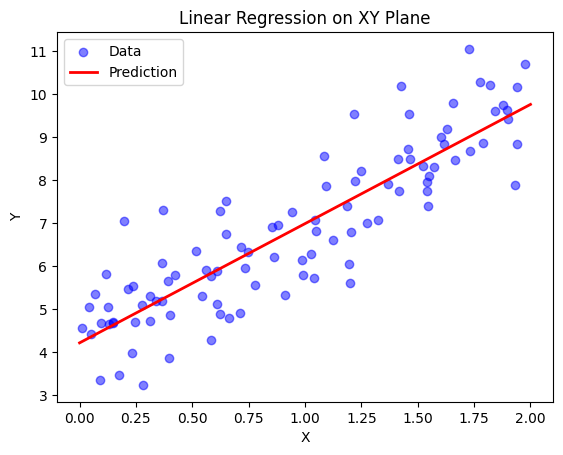

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 랜덤한 2D 데이터 생성
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # X 값 (0~2 사이의 난수)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + 노이즈 추가

# X에 절편 추가 (X_b = [1, X])
X_b = np.c_[np.ones((100, 1)), X]  # X_b = [1, x] 형태

# 정규 방정식으로 선형 회귀 계수 계산
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# 예측 수행
x_new = np.linspace(0, 2, 100).reshape(-1, 1)
X_new_b = np.c_[np.ones((100, 1)), x_new]
y_predict = X_new_b @ theta_best

# 결과 출력
print(f"Estimated coefficients: {theta_best.ravel()}")  # 기울기와 절편

# 그래프 시각화
plt.scatter(X, y, color="blue", alpha=0.5, label="Data")
plt.plot(x_new, y_predict, "r-", linewidth=2, label="Prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression on XY Plane")
plt.show()


여기서는 간단하게 역행렬을 활용해서 처리했지만, 이건 완전 다중공산성 (perfect multilcollinearity)을 만족해서 그러한 것.

현실에서는 완전공산성을 만족하는 경우를 찾기 어렵기 때문에, 이를 처리하기 위해 SVD (특이값 분해)를 통해 해결

또는 Gradient Descent 방식으로 근사 시켜서 처리